In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [50]:
df = pd.read_csv('출생아수.csv')
df = df.loc[0,:]
df

시군구별        전국
1997    675394
1998    641594
1999    620668
2000    640089
2001    559934
2002    496911
2003    495036
2004    476958
2005    438707
2006    451759
2007    496822
2008    465892
2009    444849
2010    470171
2011    471265
2012    484550
2013    436455
2014    435435
2015    438420
2016    406243
2017    357771
2018    326822
2019    302676
2020    272337
2021    260562
2022    249186
2023    230028
Name: 0, dtype: object

In [54]:
df = pd.read_csv('출생아수.csv')
df = df.loc[0,:]
X_1 = df.iloc[1:8]
X_1.values

array(['675394', '641594', '620668', '640089', '559934', '496911',
       '495036'], dtype=object)

In [57]:

df = pd.read_csv('출생아수.csv')
df = df.loc[0,:]

# X 데이터 생성
X_1 = df.iloc[1:8].values
X_2 = df.iloc[2:9].values
X_3 = df.iloc[3:10].values

# X를 합쳐서 하나의 입력 행렬로 만들기
X = np.column_stack([X_1, X_2, X_3])


# y 값
y = np.array([544817, 545015, 535093, 499877, 497405, 494312, 501568])  

# 다중 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)
print("R² 점수:", model.score(X, y))

회귀 계수: [-0.13138099  0.23207085  0.19387867]
절편: 360784.04457475705
R² 점수: 0.9398054360052251


In [61]:
X_1_future = df.iloc[8:-2].values
X_2_future = df.iloc[9:-1].values
X_3_future = df.iloc[10:].values

# X_future 데이터 결합
X_future = np.column_stack([X_1_future, X_2_future, X_3_future])

# 미래 예측 수행
y_future_pred = model.predict(X_future)

# 예측값 출력
print(y_future_pred)

[487518.37186474 504309.56952623 507055.9261608  489877.76427847
 493967.30720009 502820.55870701 502323.29294803 495938.02858228
 482833.42836571 489494.21268384 484082.51870547 466825.3156643
 453803.47251675 448308.01672353 440888.45919642 434737.06571219
 433784.8355447  428977.48109949]


In [62]:
result = np.concatenate((y, y_future_pred))

In [67]:
len(result)

25

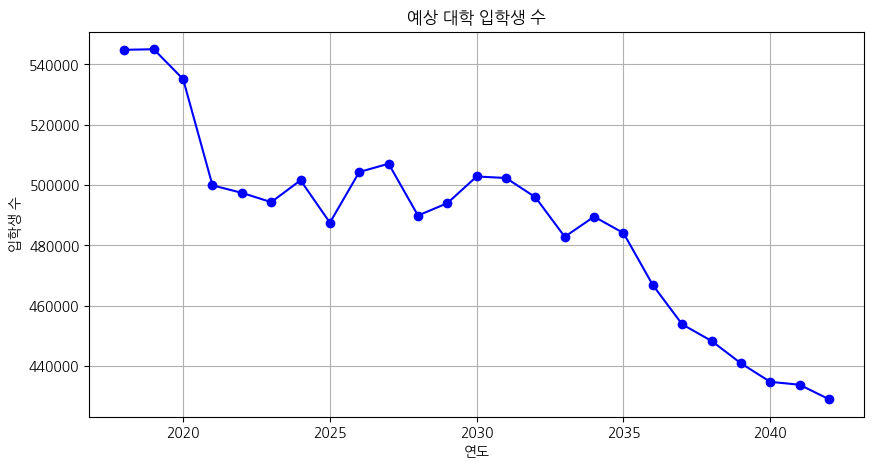

In [74]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔고딕 폰트 적용
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

years = list(range(2018, 2018 + len(result)))  # 2018년부터 시작하는 연도 리스트

# 그래프 생성
plt.figure(figsize=(10, 5))
plt.plot(years, result, marker='o', linestyle='-', color='b')

# 제목 및 축 레이블 추가
plt.title("예상 대학 입학생 수")
plt.xlabel("연도")
plt.ylabel("입학생 수")

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()